## Defs / Imports

In [7]:
import disjointification
from pathlib import Path
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook'])


## Load Saved Model

In [8]:
save_point = Path(r"c:\model\06_24_2023__18_27_55\06_24_2023__18_27_55.pkl")
test = disjointification.from_file(save_point)
test.describe()

Disjointification Test Description
features data: (3069, 9260)
labels data: (3069, 2)
min num of features to keep in disjointification: 500
correlation threshold: 0.7
last save point: c:\model\06_24_2023__18_27_55\06_24_2023__18_27_55.pkl


# Linear Prediction as a function of number of features kept

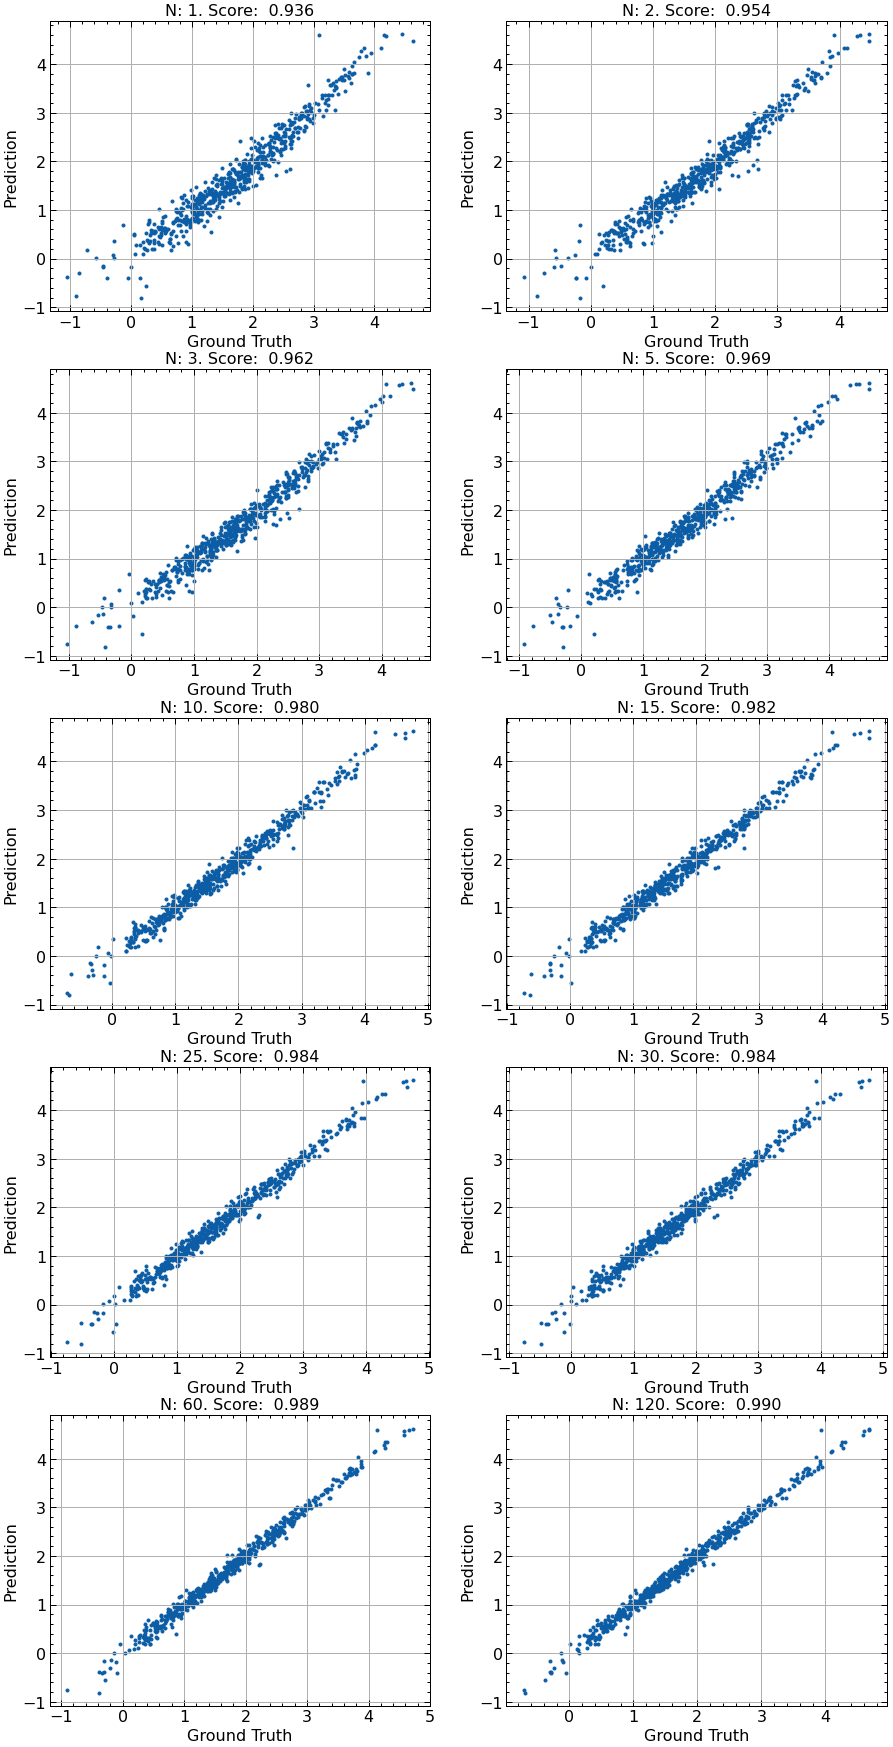

In [30]:
all_features_list = test.features_selected_in_disjointification_lin
nums_feats = [1,2,3,5,
              10,15,25,30,
              60, 120, 250, 500]
num_rows = 5
W = 15
p =5
H = int(p*W*num_rows/len(nums_feats))
fig, axs = plt.subplots(num_rows,len(nums_feats)//num_rows, figsize=(W,H))
scores = []

for ax, num_feats in zip(axs.flatten(), nums_feats):
    selected_features = all_features_list[0:num_feats]
    test.run_linear_regression(selected_features=selected_features)
    ax.scatter(test.y_pred_lin, test.y_test_lin, marker='.')
    ax.set(title=f"N: {num_feats}. Score: {test.lin_score: .3f}", xlabel="Ground Truth", ylabel="Prediction")
    ax.grid('minor')
    scores.append(test.lin_score)
    # print(num_feats)
# fig.suptitle("Prediction vs. GT as a function of number of features kept")
plt.show()

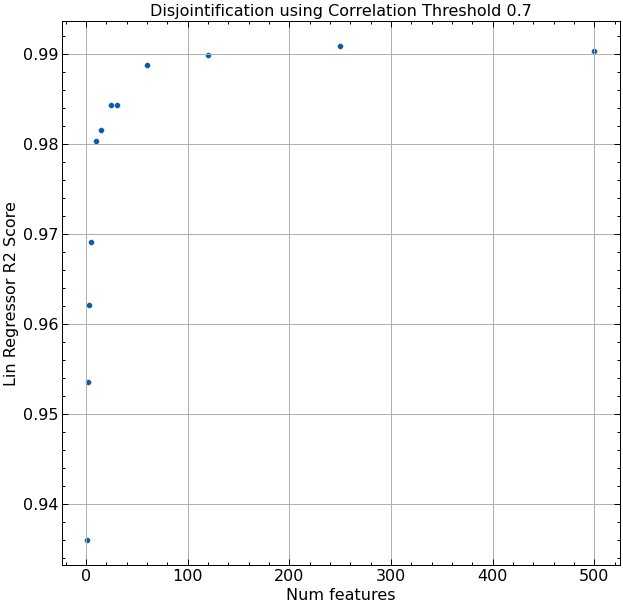

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=nums_feats, y=scores, ax=ax)
title = f"Disjointification using Correlation Threshold {test.correlation_threshold}"
ax.set(xlabel="Num features", ylabel="Lin Regressor R2 Score", title=title)
ax.grid('minor')

## TBC - Logistic Regression

C:\Users\oDror\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


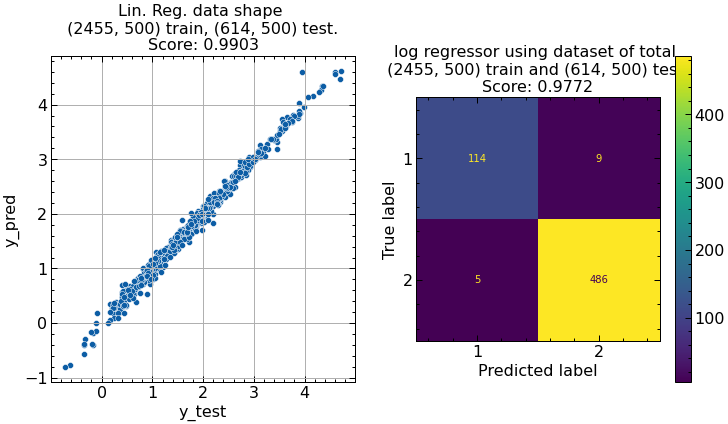

In [5]:
plt
test.run_regressions()
test.show()

C:\Users\oDror\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\oDror\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

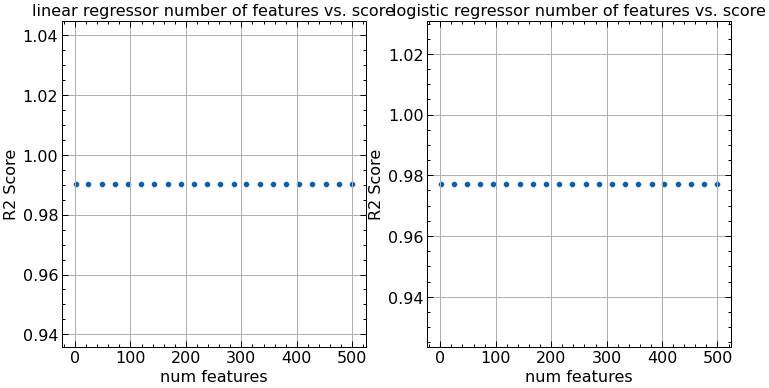

In [25]:
test.sweep_regression()
test.show_regressor_sweep()